In [1]:
get_ipython().run_line_magic('matplotlib', 'inline')
import os, sys

# sys.path.append("~/X/PythonForDataScience/air_traffic_project/submissions/first_real_submission/")

import importlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from problem import *
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, FunctionTransformer
from sklearn.decomposition import PCA
import geopy.distance
from sklearn.metrics import mean_squared_error
from model_selection_python import *
import statsmodels.api as sm
import seaborn as sns
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance


from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import os

from estimator import _merge_external_data
from keras.wrappers.scikit_learn import KerasRegressor

import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.models import Sequential
from keras.metrics import RootMeanSquaredError

from xgboost import XGBRegressor
import xgboost as xgb


pd.set_option('display.max_columns', None)

In [2]:
X_train, y_train = get_train_data('..')
X_test, y_test = get_test_data('..')

X_train_merged = _merge_external_data(X_train)
X_test_merged = _merge_external_data(X_test)

/Users/Hugo/Desktop/X-HEC/Polytechnique/Semestre 1/Python_For_Data_Science/air_traffic_project/src/external_data.csv


/Users/Hugo/Desktop/X-HEC/Polytechnique/Semestre 1/Python_For_Data_Science/air_traffic_project/src/estimator.py:38: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  X_encoded.loc[:, 'week'] = X_encoded['DateOfDeparture'].dt.week


/Users/Hugo/Desktop/X-HEC/Polytechnique/Semestre 1/Python_For_Data_Science/air_traffic_project/src/external_data.csv


In [3]:
X_train_merged.drop(['Departure', 'Arrival', 'closest_holidays_arr', 'closest_holidays_dep'], axis=1, inplace=True)
X_test_merged.drop(['Departure', 'Arrival', 'closest_holidays_arr', 'closest_holidays_dep'], axis=1, inplace=True)

print(X_train_merged.shape)
print(X_test_merged.shape)

(8902, 73)
(2226, 73)


## Testing With External Variables

In [24]:
features = ['WeeksToDeparture', 'oil_stock_volume',
                    'AAL_stock_price', 'AAL_stock_volume', 'SP_stock_price', 'SP_stock_volume',
                    'latitude_deg_dep', 'longitude_deg_dep', 'pop2010_dep', 
                    'latitude_deg_arr', 'longitude_deg_arr', 'pop2010_arr', 'distance',
                    'LoadFactorDomestic_arr', 'PassengersDomestic_arr',
                    'GDP_per_cap_dep', 'GDP_per_cap_arr', 'UnemploymentRate_dep', 'UnemploymentRate_arr', 
                    'day_departure', 'n_days_departure', 'Max TemperatureC_dep', 
            'Max TemperatureC_arr']

features_to_keep = ['WeeksToDeparture', 'oil_stock_volume',
                    'AAL_stock_price', 'AAL_stock_volume', 'SP_stock_price', 'SP_stock_volume', 'distance',
                    'UnemploymentRate_dep', 'UnemploymentRate_arr', 
                    'day_departure', 'n_days_departure', 'Max TemperatureC_dep', 
                    'Max TemperatureC_arr', 'route_mean', 'day_nb_mean', 'day_mean', 'week_mean', 'month_mean']

# forest = RandomForestRegressor(min_samples_split=0.01, max_features=0.5, oob_score=True, verbose=0)
# score = cross_val_score(forest, X_forest, y_train, cv=5)

# features_to_keep = ['WeeksToDeparture', 'week_mean', 'day_mean', 'month_mean', 'day_nb_mean', 
#                    'route_mean', 'std_wtd', 'n_days_departure']

X_train_data = X_train_merged[features_to_keep]
X_test_data = X_test_merged[features_to_keep]
print(X_train_data.shape)
print(X_test_data.shape)

(8902, 18)
(2226, 18)


In [32]:
grid_params = {
    'n_estimators': [100],
    'min_samples_split': [0.001],
    'oob_score': [True],
    'max_features': [0.5, 0.6, 0.75]
}

gs = GridSearchCV(estimator=RandomForestRegressor(),
                  param_grid=grid_params,
                  n_jobs=-1,
                  cv=5,
                  verbose=0)

gs.fit(X_train_data, y_train)        
print(gs.best_score_)
print(gs.best_params_) 

0.8593553638903867
{'max_features': 0.6, 'min_samples_split': 0.001, 'n_estimators': 100, 'oob_score': True}


In [27]:
# Prediction performance on test set is not as good as on train set

print(X_train_data.shape)
print(X_test_data.shape)
print(y_train.shape)
print(y_test.shape)

score_train = gs.score(X_train_data, y_train)
score_test = gs.score(X_test_data, y_test)

rmse_train = mean_squared_error(y_train, gs.predict(X_train_data), squared=False)
rmse_test = mean_squared_error(y_test, gs.predict(X_test_data), squared=False)

print(f"Training RMSE: {rmse_train} and Score: {score_train}")
print(f"Testing RMSE: {rmse_test} and Score: {score_test}")

(8902, 18)
(2226, 18)
(8902,)
(2226,)
Training RMSE: 0.20014987281792362 and Score: 0.9594459242163967
Testing RMSE: 0.38129483747403936 and Score: 0.8589419199160543


## Testing With External Variables

In [ ]:
# features_to_keep = ['WeeksToDeparture', 'week_mean', 'day_mean', 'month_mean', 'day_nb_mean',
#                     'route_mean', 'std_wtd', 'n_days_departure', 'distance']

# X_train_data = X_train_merged[features_to_keep]
X_train_data = X_train_merged[features_to_keep]

grid_params = {
    'n_estimators': [100],
    'min_samples_split': [0.001],
    'oob_score': [False],
    'max_features': [0.5, 0.75, 1]
}

gs = GridSearchCV(estimator=RandomForestRegressor(),
                  param_grid=grid_params,
                  n_jobs=-1,
                  cv=5,
                  verbose=0)

gs.fit(X_train_merged, y_train)        
print(gs.best_score_)
print(gs.best_params_)

# Prediction performance on test set is not as good as on train set
# X_test_data = X_test_merged[features_to_keep]
X_test_data = X_test_merged

score_train = gs.score(X_train_merged, y_train)
score_test = gs.score(X_test_merged, y_test)

rmse_train = mean_squared_error(y_train, gs.predict(X_train_merged), squared=False)
rmse_test = mean_squared_error(y_test, gs.predict(X_test_merged), squared=False)

print(f"Training RMSE: {rmse_train} and Score: {score_train}")
print(f"Testing RMSE: {rmse_test} and Score: {score_test}")

## XGBoost

In [ ]:
import xgboost as xgb

xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.5, learning_rate = 0.1,
                alpha = 10, n_estimators = 100)
xg_reg.fit(X_train_data, y_train)

preds = xg_reg.predict(X_test_data)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

In [ ]:
data_dmatrix = xgb.DMatrix(data=X_train_data,label=y_train)

params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=5,
                    num_boost_round=50, early_stopping_rounds=10, metrics="rmse", as_pandas=True, seed=123)
cv_results

In [ ]:
print((cv_results["test-rmse-mean"]).tail(1))

# XG Maxi Boost

In [ ]:
X_test_data.shape
# X_test_data.drop(['holidays_dep', 'holidays_arr'], axis=1, inplace=True)

In [ ]:
# X_train_data.drop(['holidays_dep', 'holidays_arr'], axis=1, inplace=True)

In [ ]:
X_train_data.shape

In [ ]:
dtrain = xgb.DMatrix(X_train_data, label=y_train)
dtest = xgb.DMatrix(X_test_data, label=y_test)

params = {
    # Parameters that we are going to tune.
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    'objective':'reg:linear',
}
params['eval_metric'] = "rmse"
num_boost_round = 999

model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

print("Best MAE: {:.2f} with {} rounds".format(
                 model.best_score,
                 model.best_iteration+1))

# cv_results = xgb.cv(
#     params,
#     dtrain,
#     num_boost_round=num_boost_round,
#     seed=42,
#     nfold=5,
#     metrics={'mae'},
#     early_stopping_rounds=10
# )
# cv_results

## Linear Regression

In [ ]:
# from sklearn.linear_model import LinearRegression

# features_to_keep = ['WeeksToDeparture', 'week_mean', 'day_mean', 'month_mean',
#                     'route_mean', 'std_wtd', 'year_departure', 'n_days_departure',
#                     'distance', 'closest_holidays_dep', 'closest_holidays_arr',
#                     'GDP_per_cap_dep', 'GDP_per_cap_arr',
#                     'SP_stock_volume', 'SP_stock_price',
#                     'oil_stock_price', 'oil_stock_volume',
#                     'AAL_stock_volume', 'AAL_stock_price',
#                     'Max TemperatureC_dep']

# X_train_data = X_train_merged[features_to_keep]

# grid_params = {}

# gs = GridSearchCV(estimator=LinearRegression(),
#                   param_grid=grid_params,
#                   n_jobs=-1,
#                   cv=5,
#                   verbose=0)

# gs.fit(X_train_data, y_train)        
# print(gs.best_score_)
# print(gs.best_params_)

# # Prediction performance on test set is not as good as on train set
# X_test_data = X_test_merged[features_to_keep]

# score_train = gs.score(X_train_data, y_train)
# score_test = gs.score(X_test_data, y_test)

# rmse_train = mean_squared_error(y_train, gs.predict(X_train_data), squared=False)
# rmse_test = mean_squared_error(y_test, gs.predict(X_test_data), squared=False)

# print(f"Training RMSE: {rmse_train} and Score: {score_train}")
# print(f"Testing RMSE: {rmse_test} and Score: {score_test}")

### Feature Importance

In [ ]:
# os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"
# dot_data = StringIO()
# export_graphviz(pipeline[0].estimators_[0], out_file=dot_data)
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
# Image(graph.create_png())

# # viz = dtreeviz(forest_estimator.estimators_[0], X_train_data, y_train, feature_names=X_train_data.columns, target_name="Target")
# # viz

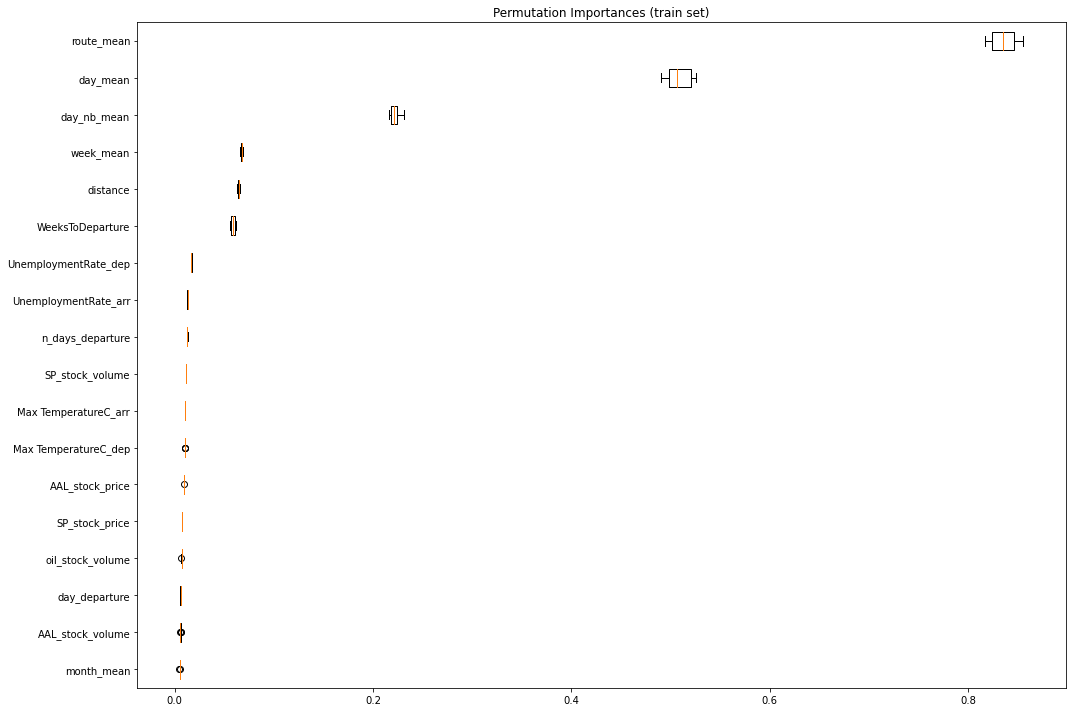

In [31]:
forest_estimator = gs.best_estimator_
pipeline = make_pipeline(forest_estimator)
pipeline.fit(X_train_data, y_train).score(X_test_data, y_test)

feature_importances = permutation_importance(
    pipeline, X_train_data, y_train, n_repeats=10
)

sorted_idx = feature_importances.importances_mean.argsort()

fig, ax = plt.subplots(figsize=(15,10))
ax.boxplot(feature_importances.importances[sorted_idx].T,
           vert=False, labels=X_train_data.columns[sorted_idx])
ax.set_title("Permutation Importances (train set)")
fig.tight_layout()
plt.show()

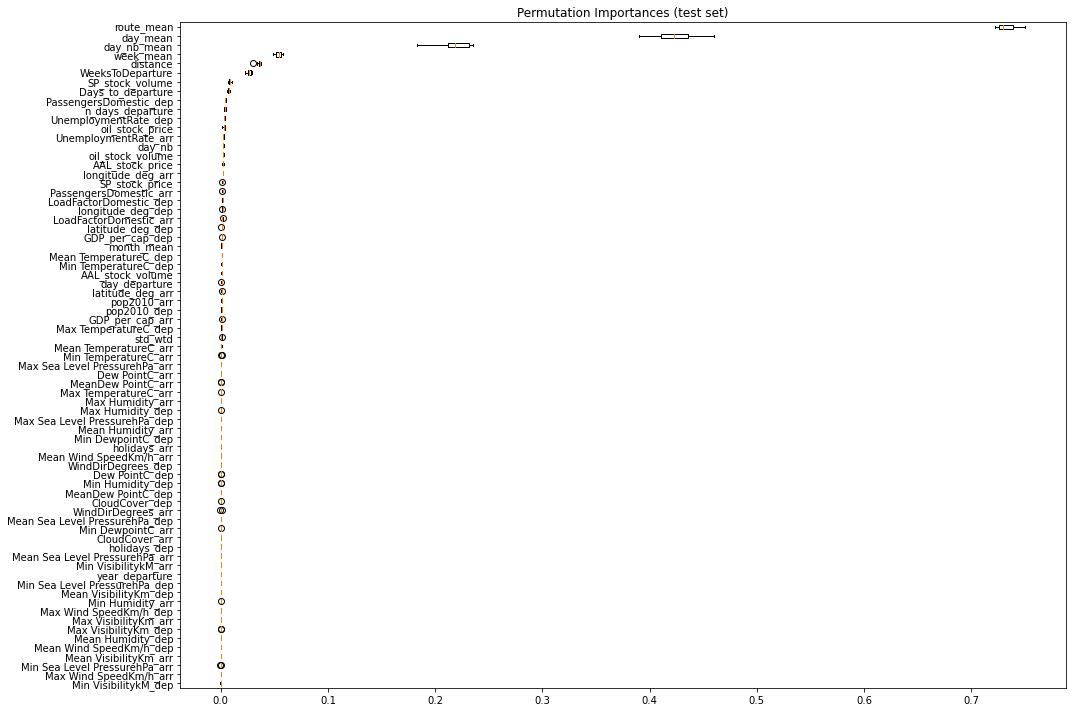

In [20]:
feature_importances = permutation_importance(
    pipeline, X_test_data, y_test, n_repeats=10
)

sorted_idx = feature_importances.importances_mean.argsort()

fig, ax = plt.subplots(figsize=(15,10))
ax.boxplot(feature_importances.importances[sorted_idx].T,
           vert=False, labels=X_test_data.columns[sorted_idx])
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()

In [ ]:
#Keras Model
def build_nn():
    model= Sequential(
                [Dense(512,activation='selu',input_shape=[13]),
                 Dense(256,activation='selu'),
                 Dropout(0.2),
                 Dense(128,activation='selu'),
                 Dense(64,activation='selu'),
                 Dense(1)
    ])
    model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['RootMeanSquaredError'])
    return model

# wrap the model using the function you created
keras_reg = KerasRegressor(
                build_nn,epochs=1000,verbose=False)
keras_reg._estimator_type = "regressor"

# just create the pipeline
pipeline = Pipeline([
    ('clf',keras_reg)
])

pipeline.fit(X_train_data, y_train)

In [ ]:
y_train_pred = pipeline.predict(X_train_data)
y_test_pred = pipeline.predict(X_test_data)

In [ ]:
score_train = pipeline.score(X_train_data, y_train)
score_test = pipeline.score(X_test_data, y_test)

rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)

print(f"Training RMSE: {rmse_train} and Score: {score_train}")
print(f"Testing RMSE: {rmse_test} and Score: {score_test}")

In [ ]:
print(y_train_pred)

In [ ]:
# plt.figure(figsize=(30, 30))
# sns.heatmap(abs(Xy_train.corr()), cmap='BrBG', annot=True, vmin=-1, vmax=1)

In [ ]:
# def evaluate(model, test_features, test_labels):
#     predictions = model.predict(test_features)
#     errors = abs(predictions - test_labels)
#     mape = 100 * np.mean(errors / test_labels)
#     accuracy = 100 - mape
#     print('Model Performance')
# #     print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
#     print('Accuracy = {:0.2f}%.'.format(accuracy))
    
#     return accuracy

In [ ]:
# plt.figure(figsize=(8, 15))
# heatmap = sns.heatmap(Xy_train.corr()[['Passengers']].sort_values(by='Passengers', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
# heatmap.set_title('Features Correlating with Sales Price', fontdict={'fontsize':18}, pad=16);

In [ ]:
# from sklearn.neighbors import KNeighborsRegressor

# grid_params = {
#     'n_neighbors': range(1, 200),
#     'weights': ['uniform', 'distance'],
#     'metric': ['euclidean', 'manhattan'],
# }

# gs = GridSearchCV(
#     KNeighborsRegressor(),
#     grid_params,
#     verbose=1,
#     cv=3,
#     n_jobs=-1
# )

# gs_results = gs.fit(X_train, y_train)

In [ ]:
# print(gs_results.best_score_)
# print(gs_results.best_estimator_)
# print(gs_results.best_params_)

In [ ]:
# X_train, y_train = problem.get_train_data('..')

In [ ]:

# grid_params = {
#     'randomforestregressor__n_estimators': [50, 100],
#     'randomforestregressor__max_features': ['auto', 'sqrt', 'log2'],
#     'randomforestregressor__max_depth': [4, 6, 8],
#     'randomforestregressor__criterion': ['mse']
# }

# # pipe = make_pipeline(StandardScaler(with_mean=False), RandomForestRegressor())

# gs = GridSearchCV(
#     pipe,
#     grid_params,
#     verbose=1,
#     cv=3,
#     n_jobs=-1
# )

# gs_results = gs.fit(X_train, y_train)

In [ ]:
# print(gs_results.best_score_)
# print(gs_results.best_estimator_)
# print(gs_results.best_params_)

## Feature Importance

In [ ]:
# from sklearn.inspection import permutation_importance

# feature_importances = permutation_importance(
#     pipe, X_train, y_train, n_repeats=10
# )
# sorted_idx = feature_importances.importances_mean.argsort()

In [ ]:
# fig, ax = plt.subplots(figsize=(15, 15))
# ax.boxplot(feature_importances.importances[sorted_idx].T,
#            vert=False, labels=X_train.columns[sorted_idx])
# ax.set_title("Permutation Importances (train set)")
# fig.tight_layout()
# plt.show()

In [ ]:
# feature_importances = permutation_importance(
#     pipe, X_test, y_test, n_repeats=10
# )
# sorted_idx = feature_importances.importances_mean.argsort()

In [ ]:
# fig, ax = plt.subplots(figsize=(15, 15))
# ax.boxplot(feature_importances.importances[sorted_idx].T,
#            vert=False, labels=X_test.columns[sorted_idx])
# ax.set_title("Permutation Importances (test set)")
# fig.tight_layout()
# plt.show()

## Predictor Selection

In [ ]:
# X_train = sm.add_constant(X_train)
# print(X_train.info())
# print("X as array:", np.asarray(X_train))
# print("y as array:", np.asarray(y_train))
# model_both = forwardSelection(X_train.astype(float), y_train.astype(float))

In [ ]:
# def plot_pca(data, index, n_components=2):
#     """ Plot the PCA transformation of Sklearn module

#     Args:
#         data (np.array): Original scaled data as numpy array 
#                          (n samples, d features)
#         index (list): list of strings to label samples
#         n_components (int, optional): Number of Principal Components to keep. 
#                                       Defaults to 2.
#     """

#     pca = PCA(n_components=n_components)
#     pca_data = pca.fit_transform(data)
#     per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)

#     labels = []
#     for i in range(len(per_var)):
#         labels.append('PC' + str(i + 1) + " : " + str(per_var[i]))

#     pca_df = pd.DataFrame(pca_data, index=index, columns=labels)

#     if n_components == 2:
#         plt.scatter(pca_df[labels[0]], pca_df[labels[1]], alpha=0.1)
#         plt.xlabel(labels[0])
#         plt.ylabel(labels[1])
# #         for sample in pca_df.index:
# #             plt.annotate(sample, (pca_df.loc[sample, labels[0]], pca_df.loc[sample, labels[1]]), rotation=45)
    
#     elif n_components == 3:
#         fig = plt.figure()
#         ax = fig.add_subplot(111, projection='3d')
#         X = pca_df[labels[0]]
#         Y = pca_df[labels[1]]
#         Z = pca_df[labels[2]]
#         ax.scatter(X, Y, Z)
#         ax.set_xlabel(labels[0], labelpad=20)
#         ax.set_ylabel(labels[1], labelpad=20)
#         ax.set_zlabel(labels[2], labelpad=20)
#         for sample in pca_df.index:
#             ax.text(pca_df.loc[sample, labels[0]], pca_df.loc[sample, labels[1]], pca_df.loc[sample, labels[2]],
#                     '%s' % sample, size=20, color='k', rotation=50) 
#     plt.title("Data projected on space given by the {} principal components.".format(n_components))
#     plt.show()
    
#     plt.hist(per_var)
#     plt.show()
        

# scaler = StandardScaler()
# scaler.fit(X_train)

# scaled_X_train_np = scaler.transform(X_train)
# scaled_X_train_df = pd.DataFrame(scaled_X_train_np, index=X_train.index, columns=X_train.columns)
# # scaled_consumption_df 

# pca = PCA(n_components=25)
# pca_data = pca.fit_transform(scaled_X_train_np)
# per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
# print(per_var)
# print(sum(per_var))

## Model

In [ ]:
# from sklearn.preprocessing import OneHotEncoder, StandardScaler
# from sklearn.linear_model import LinearRegression

# pipe = make_pipeline(OneHotEncoder(handle_unknown='ignore'),
#                     StandardScaler(with_mean=False),
#                     LinearRegression())

In [ ]:
# pipe.fit(X_train, y_train)
# y_train_pred = pipe.predict(X_train)
# #print("10 first y_train pred = ", y_train_pred[:10])
# #print("10 first y_train = ", y_train[:10])
# print("Score on train set = ", pipe.score(X_train, y_train))

# mean_error_train = mean_squared_error(y_train, y_train_pred)
# print("Mean square error = ", mean_error_train)

# y_test_pred = pipe.predict(X_test)
# #print("10 first y_test pred = ", y_test_pred[:10])
# #print("10 first y_test = ", y_test[:10])
# print("Score on test set = ", pipe.score(X_test, y_test))

# mean_error_test = mean_squared_error(y_test, y_test_pred)
# print("Mean square error = ", mean_error_test)